In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("C:\\Users\\LAPTOP\\Documents\\adult.csv")

In [5]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 48842
Columns: 15


In [5]:
#What are the data types of each column (numeric, categorical, object)?
print(df.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [6]:
#How many unique values exist in each categorical column?
# Select only categorical columns (dtype = object)
categorical_cols = df.select_dtypes(include=['object']).columns

# Count unique values for each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

workclass: 9 unique values
education: 16 unique values
marital-status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
gender: 2 unique values
native-country: 42 unique values
income: 2 unique values


In [7]:
#What is the distribution of the target variable income (<=50K vs >50K)?
# Count distribution of target variable
print(df['income'].value_counts())

# Show percentages as well
print("\nPercentage distribution:")
print(df['income'].value_counts(normalize=True) * 100)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Percentage distribution:
income
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64


In [8]:
#What are the summary statistics (mean, median, std, min, max, quartiles) of numerical columns like age, fnlwgt, educational-num, hours-per-week, capital-gain, capital-loss?
# Summary statistics for numerical columns
print(df[['age', 'fnlwgt', 'educational-num', 'hours-per-week', 
          'capital-gain', 'capital-loss']].describe())

                age        fnlwgt  educational-num  hours-per-week  \
count  48842.000000  4.884200e+04     48842.000000    48842.000000   
mean      38.643585  1.896641e+05        10.078089       40.422382   
std       13.710510  1.056040e+05         2.570973       12.391444   
min       17.000000  1.228500e+04         1.000000        1.000000   
25%       28.000000  1.175505e+05         9.000000       40.000000   
50%       37.000000  1.781445e+05        10.000000       40.000000   
75%       48.000000  2.376420e+05        12.000000       45.000000   
max       90.000000  1.490400e+06        16.000000       99.000000   

       capital-gain  capital-loss  
count  48842.000000  48842.000000  
mean    1079.067626     87.502314  
std     7452.019058    403.004552  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    99999.000000   4356.000000  


In [10]:
import matplotlib.pyplot as plt

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


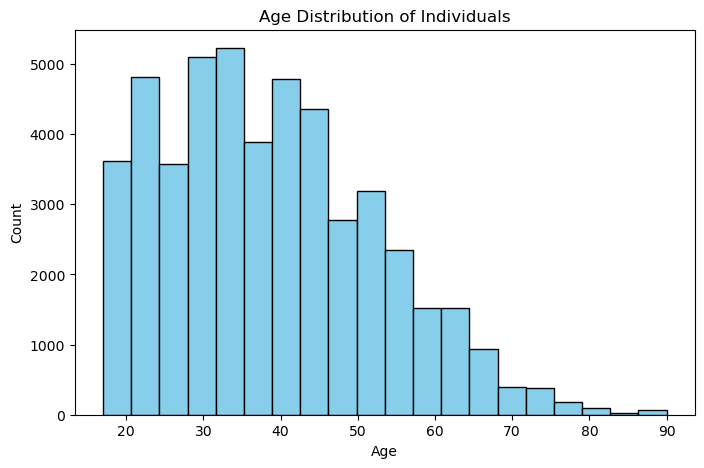

In [11]:
#What is the age distribution of individuals?
print(df['age'].describe())

# Plot histogram of age distribution
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Minimum hours: 1
Maximum hours: 99


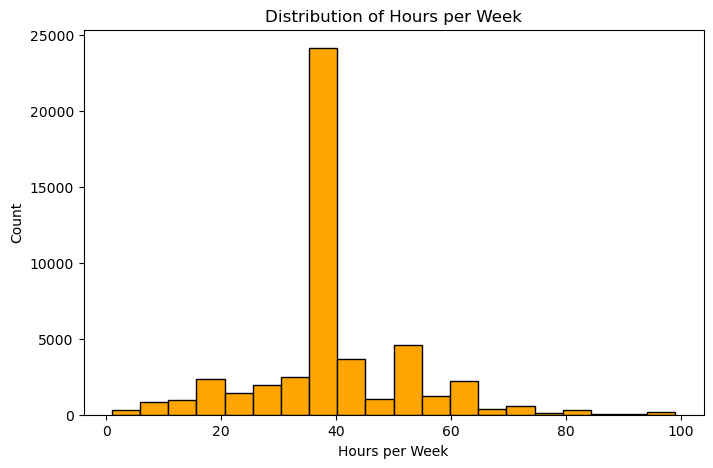

In [13]:
#What is the distribution of hours-per-week? Are there extreme values (like people working 0 or 100 hours)?
# Summary stats for hours-per-week
print(df['hours-per-week'].describe())

# Check extreme values
print("\nMinimum hours:", df['hours-per-week'].min())
print("Maximum hours:", df['hours-per-week'].max())

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['hours-per-week'], bins=20, color='orange', edgecolor='black')
plt.title("Distribution of Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.show()

In [14]:
#Which individuals have the highest capital-gain and capital-loss?
# Individual(s) with highest capital-gain
print("Highest Capital Gain:")
print(df[df['capital-gain'] == df['capital-gain'].max()])

# Individual(s) with highest capital-loss
print("\nHighest Capital Loss:")
print(df[df['capital-loss'] == df['capital-loss'].max()])

Highest Capital Gain:
       age         workclass  fnlwgt    education  educational-num  \
83      44      Self-emp-inc  223881      HS-grad                9   
346     39           Private  198654      HS-grad                9   
357     50  Self-emp-not-inc  165001  Prof-school               15   
418     54      Self-emp-inc  159219  Prof-school               15   
692     41           Private  191547      Masters               14   
...    ...               ...     ...          ...              ...   
48109   47           Private  155664      Masters               14   
48253   43      Self-emp-inc   62026  Prof-school               15   
48371   66           Private  115498    Bachelors               13   
48519   47           Private  294913  Prof-school               15   
48799   57         Local-gov  110417      HS-grad                9   

           marital-status       occupation relationship   race  gender  \
83     Married-civ-spouse     Craft-repair      Husband  White 

In [20]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
#What# Unique values and their counts in workclass
df['workclass'].value_counts()
 


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [24]:
#How is education distributed? Which education levels are most common?
# Count of each education level
df['education'].value_counts()

# If you want it in percentages too
df['education'].value_counts(normalize=True) * 100


education
HS-grad         32.316449
Some-college    22.271815
Bachelors       16.430531
Masters          5.439990
Assoc-voc        4.219729
11th             3.709922
Assoc-acdm       3.277917
10th             2.843864
7th-8th          1.955284
Prof-school      1.707547
9th              1.547848
12th             1.345154
Doctorate        1.216166
5th-6th          1.042136
1st-4th          0.505712
Preschool        0.169936
Name: proportion, dtype: float64

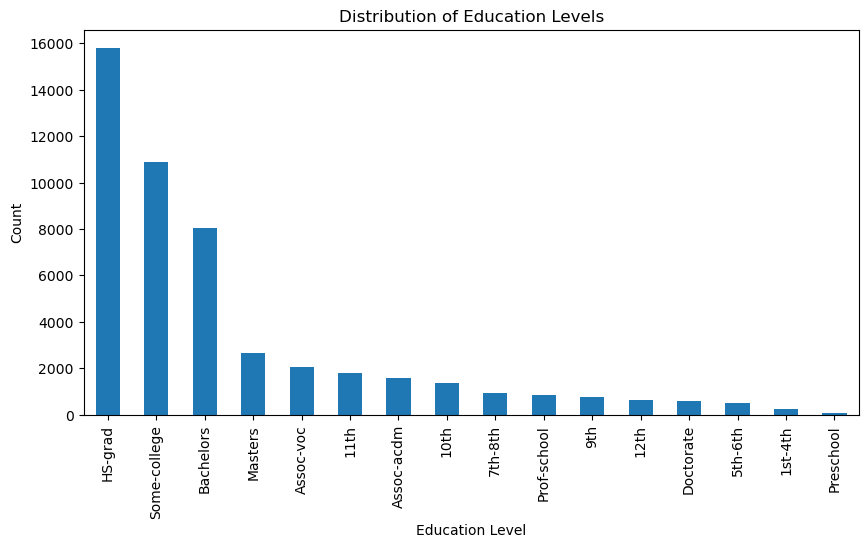

In [25]:
#How is education distributed? Which education levels are most common?
import matplotlib.pyplot as plt

df['education'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


In [26]:
#Does educational-num map properly to education categories (e.g., HS-grad → 9)?
# Cross-check mapping between education and educational-num
df[['education', 'educational-num']].drop_duplicates().sort_values('educational-num')


,education,educational-num
779,Preschool,1
323,1st-4th,2
37,5th-6th,3
9,7th-8th,4
54,9th,5
5,10th,6
0,11th,7
173,12th,8
1,HS-grad,9
3,Some-college,10


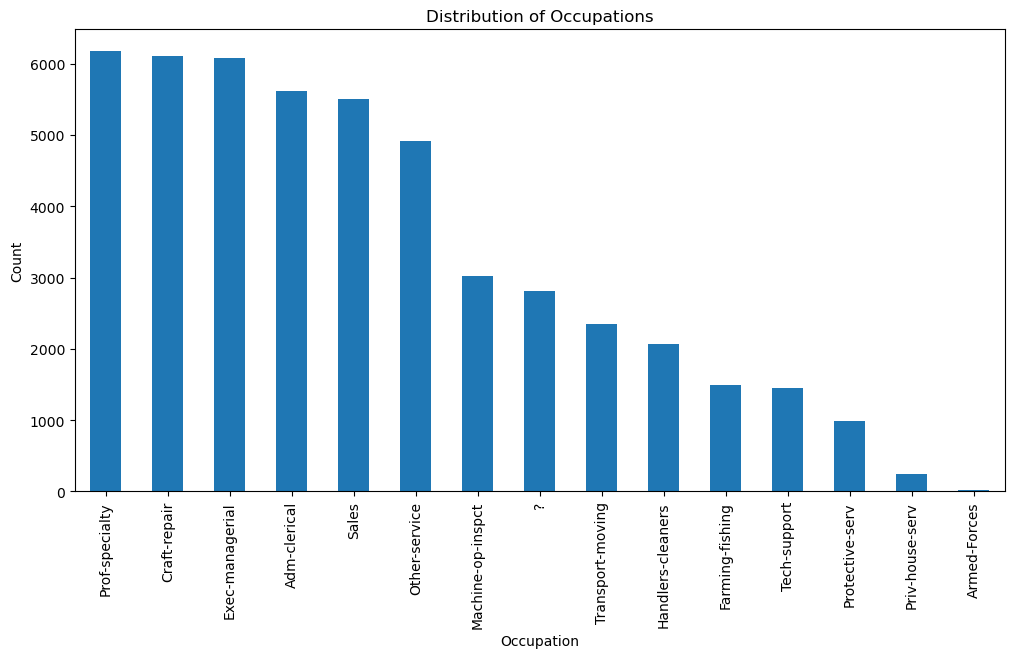

In [27]:
#What are the common occupations (occupation) and how are they distributed?
import matplotlib.pyplot as plt

df['occupation'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Distribution of Occupations")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()


In [28]:
#How are marital statuses distributed in marital-status?
# Counts of each marital status
df['marital-status'].value_counts()

# Percent distribution
df['marital-status'].value_counts(normalize=True) * 100


marital-status
Married-civ-spouse       45.819172
Never-married            32.998239
Divorced                 13.580525
Separated                 3.132550
Widowed                   3.107981
Married-spouse-absent     1.285779
Married-AF-spouse         0.075754
Name: proportion, dtype: float64

In [30]:
#What are the proportions of genders in the dataset?
# Count of genders
df['gender'].value_counts()

# Proportions (in %)
df['gender'].value_counts(normalize=True) * 100


gender
Male      66.848204
Female    33.151796
Name: proportion, dtype: float64

In [31]:
#What is the race distribution in the dataset?
# Race counts
df['race'].value_counts()

# Race proportions (percentage)
df['race'].value_counts(normalize=True) * 100


race
White                 85.504279
Black                  9.592154
Asian-Pac-Islander     3.110028
Amer-Indian-Eskimo     0.962287
Other                  0.831252
Name: proportion, dtype: float64

In [32]:
#Which countries are represented in native-country, and which are most frequent?
# List of countries with counts
df['native-country'].value_counts()

# Proportions in %
df['native-country'].value_counts(normalize=True) * 100


native-country
United-States                 89.742435
Mexico                         1.947095
?                              1.754637
Philippines                    0.603988
Germany                        0.421768
Puerto-Rico                    0.376725
Canada                         0.372630
El-Salvador                    0.317350
India                          0.309160
Cuba                           0.282544
England                        0.260022
China                          0.249785
South                          0.235453
Jamaica                        0.217026
Italy                          0.214979
Dominican-Republic             0.210884
Japan                          0.188362
Guatemala                      0.180173
Poland                         0.178125
Vietnam                        0.176078
Columbia                       0.174031
Haiti                          0.153556
Portugal                       0.137177
Taiwan                         0.133082
Iran                     

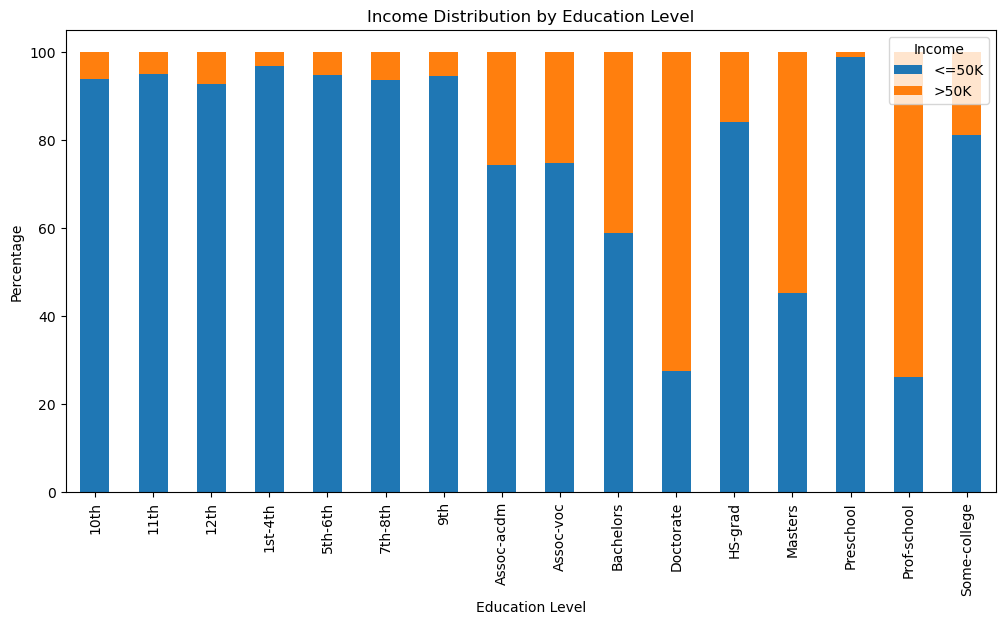

In [33]:
#How does income (<=50K vs >50K) vary with education level?
import matplotlib.pyplot as plt

edu_income = pd.crosstab(df['education'], df['income'], normalize='index') * 100
edu_income.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.legend(title="Income")
plt.show()


In [34]:
#What is the relationship between age and income category?
# Compare average ages by income category
df.groupby('income')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,37155.0,36.872184,14.104118,17.0,25.0,34.0,46.0,90.0
>50K,11687.0,44.275178,10.558983,19.0,36.0,43.0,51.0,90.0


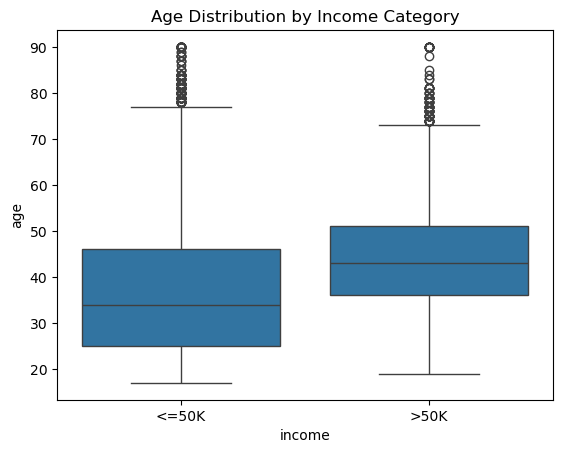

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='income', y='age', data=df)
plt.title("Age Distribution by Income Category")
plt.show()


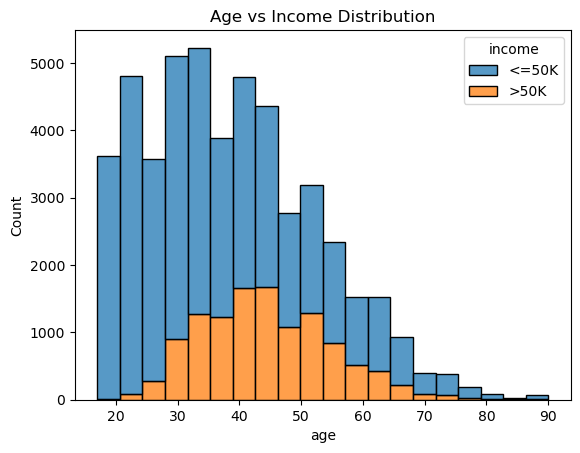

In [36]:
sns.histplot(data=df, x='age', hue='income', multiple='stack', bins=20)
plt.title("Age vs Income Distribution")
plt.show()


In [37]:
#Do certain occupations correlate with higher income?
# Cross-tab of occupation vs income
pd.crosstab(df['occupation'], df['income'])

# Normalize by row to see percentages
pd.crosstab(df['occupation'], df['income'], normalize='index') * 100


income,<=50K,>50K
occupation,,
?,90.566038,9.433962
Adm-clerical,86.312600,13.687400
Armed-Forces,66.666667,33.333333
Craft-repair,77.372382,22.627618
Exec-managerial,52.218206,47.781794
Farming-fishing,88.389262,11.610738
Handlers-cleaners,93.339768,6.660232
Machine-op-inspct,87.690271,12.309729
Other-service,95.856185,4.143815


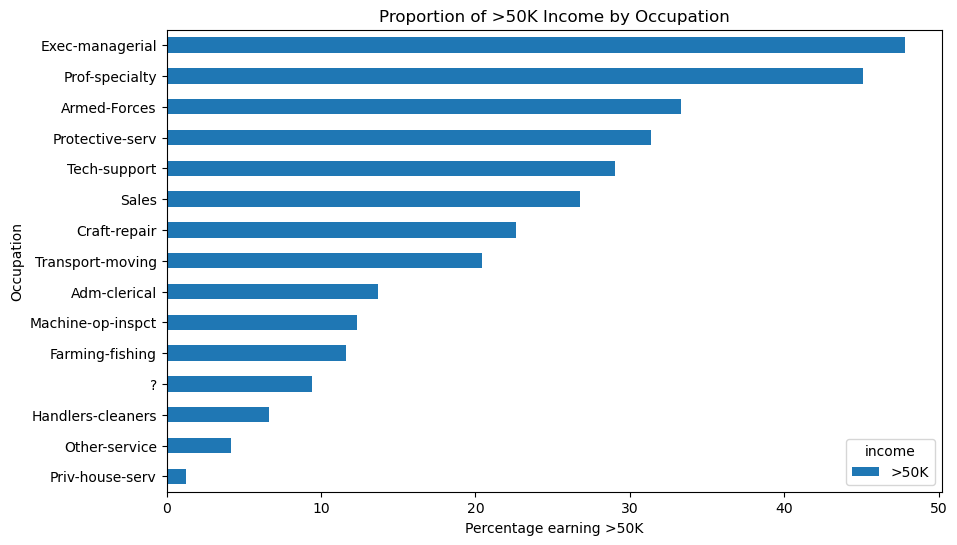

In [38]:
import matplotlib.pyplot as plt

occ_income = pd.crosstab(df['occupation'], df['income'], normalize='index') * 100
occ_income.sort_values(by='>50K')[['>50K']].plot(kind='barh', figsize=(10,6))

plt.title("Proportion of >50K Income by Occupation")
plt.xlabel("Percentage earning >50K")
plt.ylabel("Occupation")
plt.show()


In [40]:
#Does gender affect income level distribution?
# Cross-tab of gender vs income
pd.crosstab(df['gender'], df['income'])

# Percent distribution by gender
pd.crosstab(df['gender'], df['income'], normalize='index') * 100


income,<=50K,>50K
gender,,
Female,89.074852,10.925148
Male,69.623277,30.376723


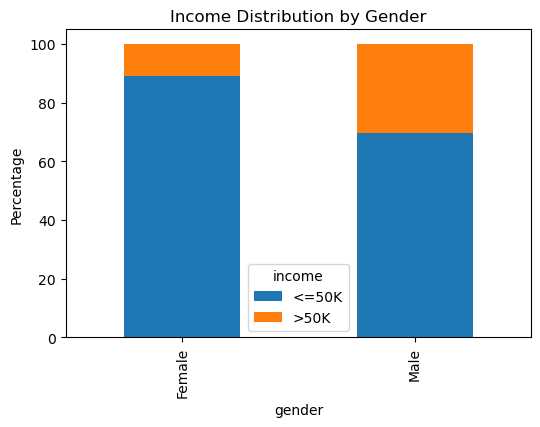

In [41]:
import matplotlib.pyplot as plt

gender_income = pd.crosstab(df['gender'], df['income'], normalize='index') * 100
gender_income.plot(kind='bar', stacked=True, figsize=(6,4))

plt.title("Income Distribution by Gender")
plt.ylabel("Percentage")
plt.show()


In [42]:
#How does race distribution differ across income categories?
# Cross-tab race vs income
pd.crosstab(df['race'], df['income'])

# Percent distribution by race
pd.crosstab(df['race'], df['income'], normalize='index') * 100


income,<=50K,>50K
race,,
Amer-Indian-Eskimo,88.297872,11.702128
Asian-Pac-Islander,73.074391,26.925609
Black,87.918890,12.081110
Other,87.684729,12.315271
White,74.601312,25.398688


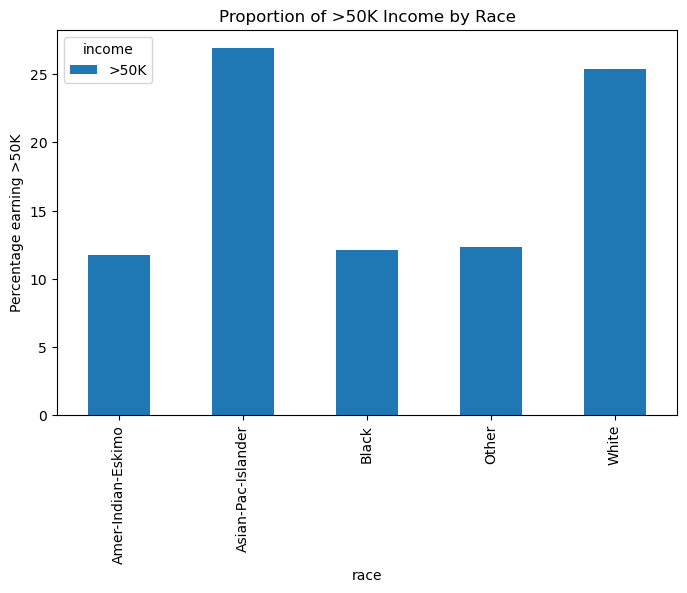

In [43]:
import matplotlib.pyplot as plt

race_income = pd.crosstab(df['race'], df['income'], normalize='index') * 100
race_income[['>50K']].plot(kind='bar', figsize=(8,5))

plt.title("Proportion of >50K Income by Race")
plt.ylabel("Percentage earning >50K")
plt.show()


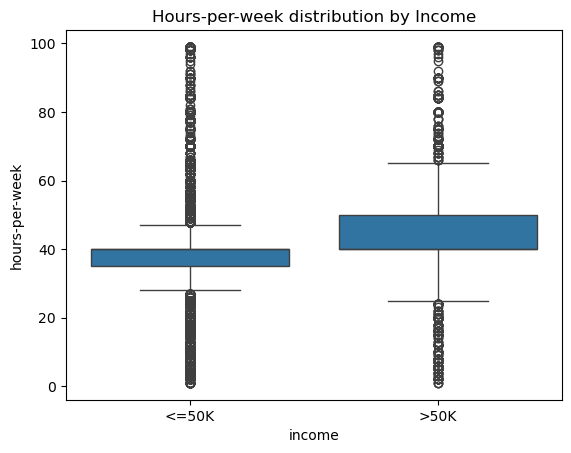

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,37155.0,38.840048,12.356849,1.0,35.0,40.0,40.0,99.0
>50K,11687.0,45.452896,11.091176,1.0,40.0,40.0,50.0,99.0


In [44]:
#What is the effect of hours-per-week on income (>50K vs <=50K)?
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare hours-per-week by income
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title("Hours-per-week distribution by Income")
plt.show()

# Mean/median hours by income category
df.groupby('income')['hours-per-week'].describe()


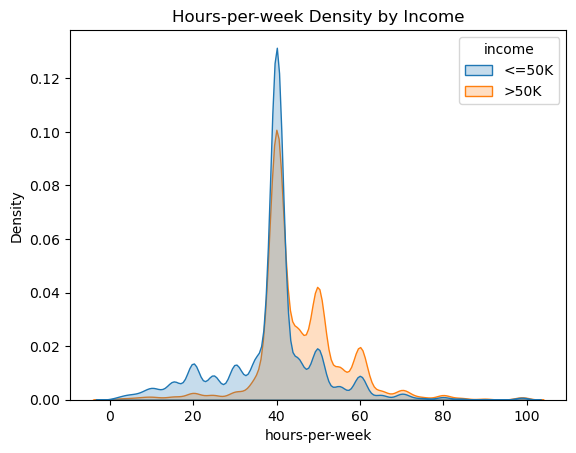

In [45]:
sns.kdeplot(data=df, x="hours-per-week", hue="income", fill=True, common_norm=False)
plt.title("Hours-per-week Density by Income")
plt.show()


income
<=50K    0.041556
>50K     0.213143
Name: has_capital_gain, dtype: float64


(0.0, 50000.0)

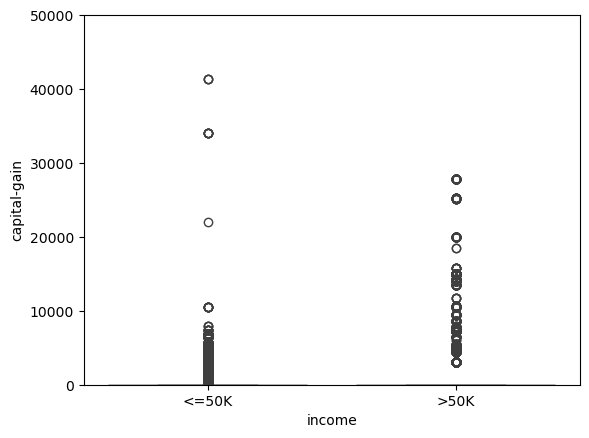

In [46]:
#Does capital-gain strongly influence income prediction?
# Check distribution of capital-gain by income
df.groupby('income')['capital-gain'].describe()

# Compare nonzero capital gains across income groups
df['has_capital_gain'] = df['capital-gain'] > 0
print(df.groupby('income')['has_capital_gain'].mean())

# Visualization
import seaborn as sns
sns.boxplot(x='income', y='capital-gain', data=df)
plt.ylim(0, 50000)  # zoom in to see typical range


In [47]:
#How many total observations (rows) and features (columns) are in the full dataset?
print("Rows, Columns:", df.shape)


Rows, Columns: (48842, 15)


In [48]:
#What are the data types (e.g., integer, continuous, categorical/object) of each column?
# Pandas dtypes
df.dtypes

# If you want a mapping of type categories
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: Categorical")
    else:
        print(f"{col}: Numerical")


age: Numerical
workclass: Categorical
education: Categorical
educational-num: Numerical
marital-status: Categorical
occupation: Categorical
relationship: Categorical
race: Categorical
gender: Categorical
capital-gain: Numerical
capital-loss: Numerical
hours-per-week: Numerical
native-country: Categorical
income: Categorical
has_capital_gain: Numerical


income
<=50K    37155
>50K     11687
Name: count, dtype: int64
income
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64


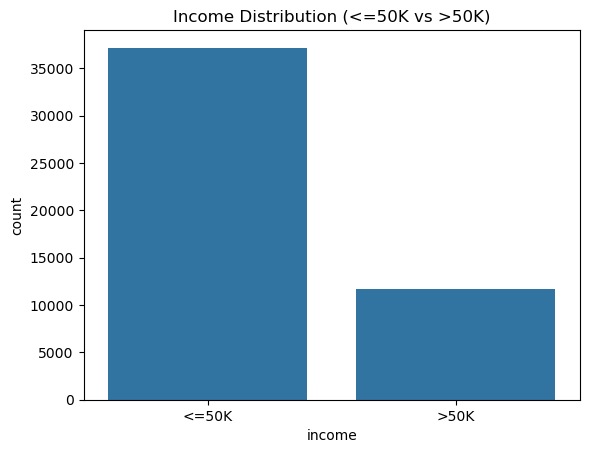

In [49]:
#What is the distribution of the target variable, income? (i.e., What percentage of individuals earn >$50K versus ≤$50K?)
# Value counts
print(df['income'].value_counts())

# Percentage distribution
print(df['income'].value_counts(normalize=True) * 100)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=df)
plt.title("Income Distribution (<=50K vs >50K)")
plt.show()


In [51]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,has_capital_gain
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,False
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,False
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,False
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,True
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,False
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,False
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,False
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,False


In [53]:
#What are the minimum, maximum, mean, and median values for the numerical columns like age, fnlwgt, capital-gain, capital-loss, and hours-per-week?
num_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

# Descriptive stats
df[num_cols].describe().T[['min','max','mean','50%']]


,min,max,mean,50%
age,17.0,90.0,38.643585,37.0
capital-gain,0.0,99999.0,1079.067626,0.0
capital-loss,0.0,4356.0,87.502314,0.0
hours-per-week,1.0,99.0,40.422382,40.0


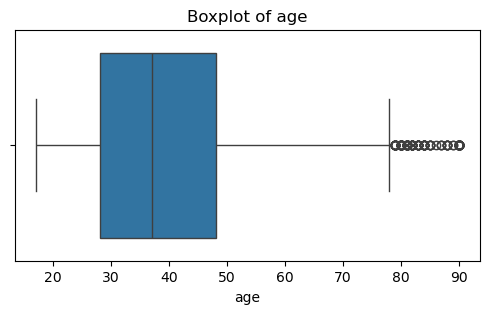

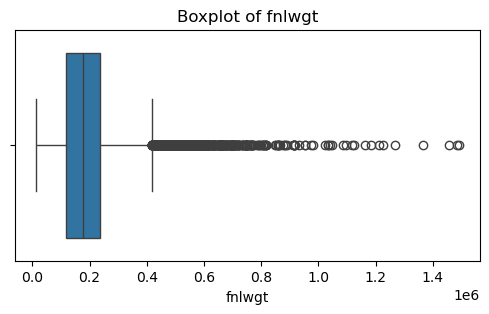

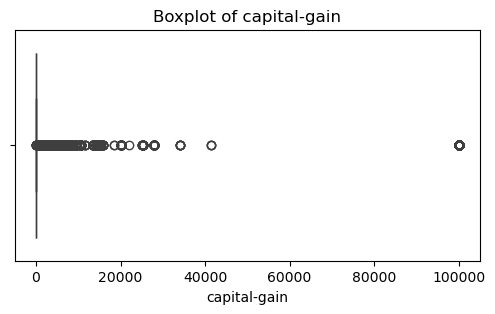

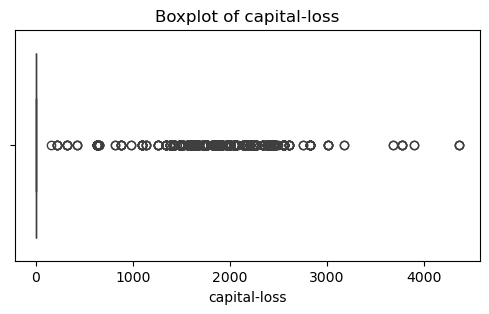

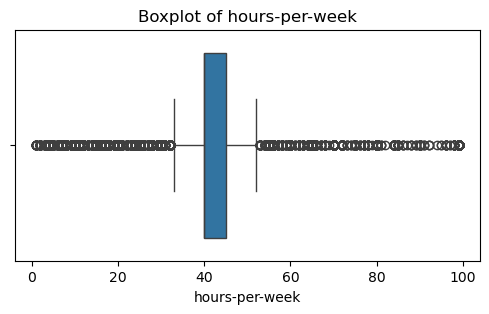

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [57]:
#For the categorical features (workclass, education, marital-status, occupation, relationship, race, gender, native-country), what are the top 5 most frequent categories in each column?
cat_cols = ['workclass', 'education', 'marital-status', 
            'occupation', 'relationship', 'race', 
            'gender', 'native-country']

for col in cat_cols:
    print(f"\nTop 5 categories in {col}:")
    print(df[col].value_counts().head(5))



Top 5 categories in workclass:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Name: count, dtype: int64

Top 5 categories in education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: count, dtype: int64

Top 5 categories in marital-status:
marital-status
Married-civ-spouse    22379
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: count, dtype: int64

Top 5 categories in occupation:
occupation
Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: count, dtype: int64

Top 5 categories in relationship:
relationship
Husband          19716
Not-in-family    12583
Own-child         7581
Unmarried         5125
Wife              2331
Name: count, dtype: int64

Top 5 categories in race:


In [58]:
#How many unique categories are there in the high-cardinality feature native-country?
# Count unique categories
print("Unique native-country categories:", df['native-country'].nunique())

# List them
print("\nList of countries:")
print(df['native-country'].unique())


Unique native-country categories: 42

List of countries:
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


income            <=50K       >50K
education                         
10th          93.736501   6.263499
11th          94.922737   5.077263
12th          92.694064   7.305936
1st-4th       96.761134   3.238866
5th-6th       94.695481   5.304519
7th-8th       93.507853   6.492147
9th           94.576720   5.423280
Assoc-acdm    74.203623  25.796377
Assoc-voc     74.672489  25.327511
Bachelors     58.716511  41.283489
Doctorate     27.441077  72.558923
HS-grad       84.142169  15.857831
Masters       45.088446  54.911554
Preschool     98.795181   1.204819
Prof-school   26.019185  73.980815
Some-college  81.035117  18.964883


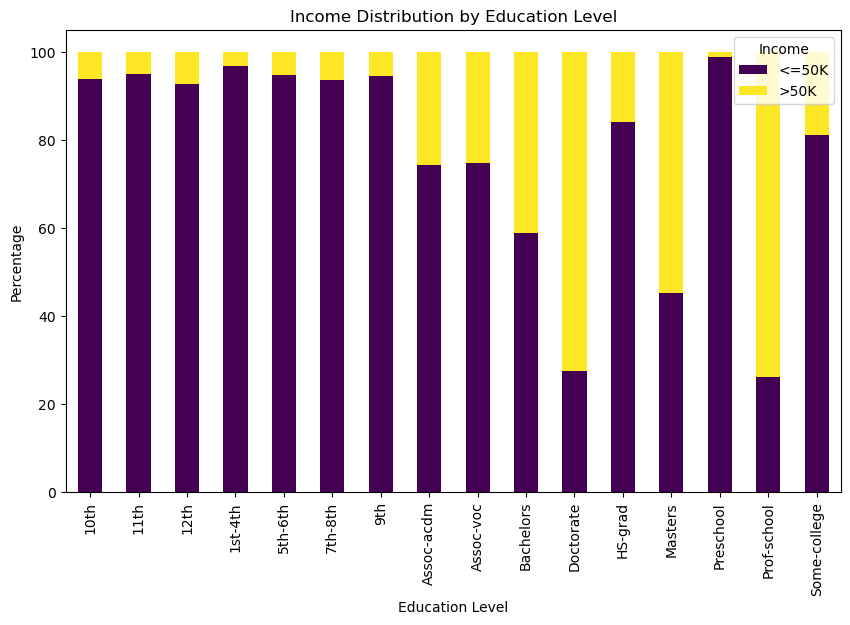

In [59]:
# Cross-tabulation of income by education
edu_income = pd.crosstab(df['education'], df['income'], normalize='index') * 100
print(edu_income)

# Bar plot
edu_income.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Income Distribution by Education Level")
plt.ylabel("Percentage")
plt.xlabel("Education Level")
plt.legend(title="Income")
plt.show()


In [60]:
#What is the average age for people in the >$50K income group compared to the ≤$50K group?
# Group by income and calculate mean age
avg_age = df.groupby('income')['age'].mean()
print(avg_age)

# Optional: median age too
median_age = df.groupby('income')['age'].median()
print(median_age)


income
<=50K    36.872184
>50K     44.275178
Name: age, dtype: float64
income
<=50K    34.0
>50K     43.0
Name: age, dtype: float64


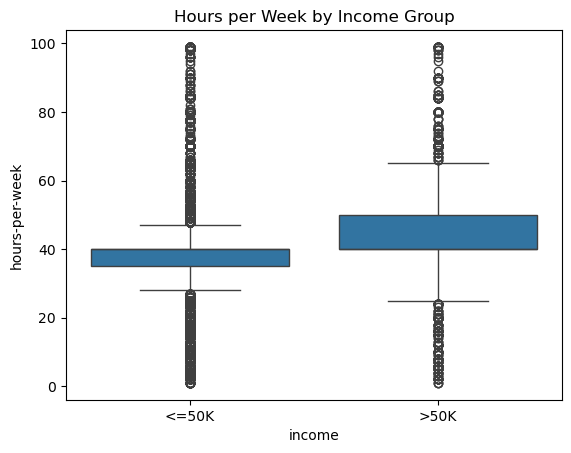

income
<=50K    38.840048
>50K     45.452896
Name: hours-per-week, dtype: float64
income
<=50K    40.0
>50K     40.0
Name: hours-per-week, dtype: float64


In [61]:
#Is there a difference in the distribuation of hours-per-week worked between the >$50K and ≤$50K income groups?
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot comparison
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title("Hours per Week by Income Group")
plt.show()

# Group averages
avg_hours = df.groupby('income')['hours-per-week'].mean()
print(avg_hours)

# Median comparison
median_hours = df.groupby('income')['hours-per-week'].median()
print(median_hours)


income                 <=50K       >50K
occupation                             
Exec-managerial    52.218206  47.781794
Prof-specialty     54.893065  45.106935
Armed-Forces       66.666667  33.333333
Protective-serv    68.667345  31.332655
Tech-support       70.954357  29.045643
Sales              73.201308  26.798692
Craft-repair       77.372382  22.627618
Transport-moving   79.575372  20.424628
Adm-clerical       86.312600  13.687400
Machine-op-inspct  87.690271  12.309729


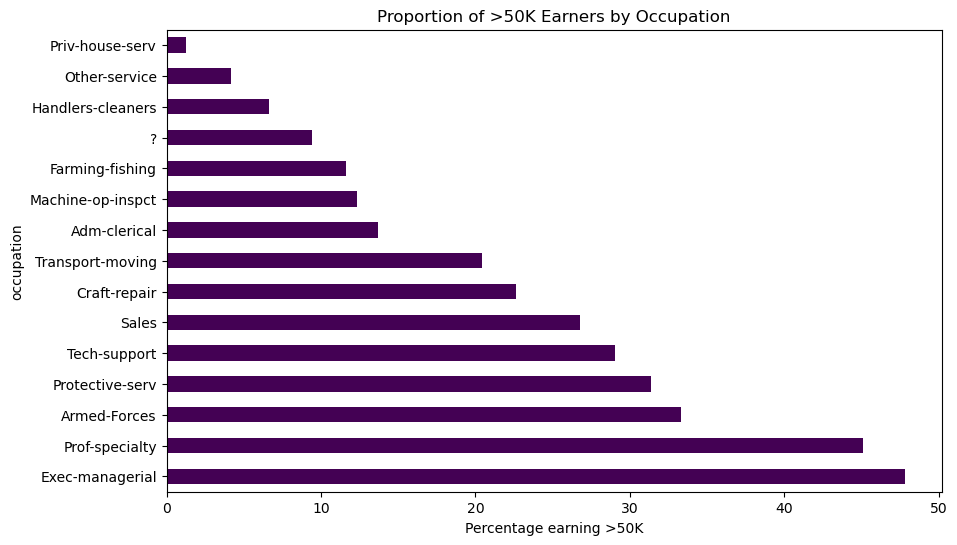

In [62]:
#Which occupation categories have the highest proportion of individuals earning >$50K?
# Proportion of >50K earners within each occupation
occupation_income = pd.crosstab(df['occupation'], df['income'], normalize='index') * 100
print(occupation_income.sort_values('>50K', ascending=False).head(10))

# Bar plot
occupation_income.sort_values('>50K', ascending=False)['>50K'].plot(kind='barh', figsize=(10,6), colormap="viridis")
plt.title("Proportion of >50K Earners by Occupation")
plt.xlabel("Percentage earning >50K")
plt.show()


gender               Female       Male
workclass                             
?                 45.373348  54.626652
Federal-gov       31.564246  68.435754
Local-gov         40.114796  59.885204
Never-worked      30.000000  70.000000
Private           34.209284  65.790716
Self-emp-inc      12.448378  87.551622
Self-emp-not-inc  16.286898  83.713102
State-gov         38.515901  61.484099
Without-pay       33.333333  66.666667


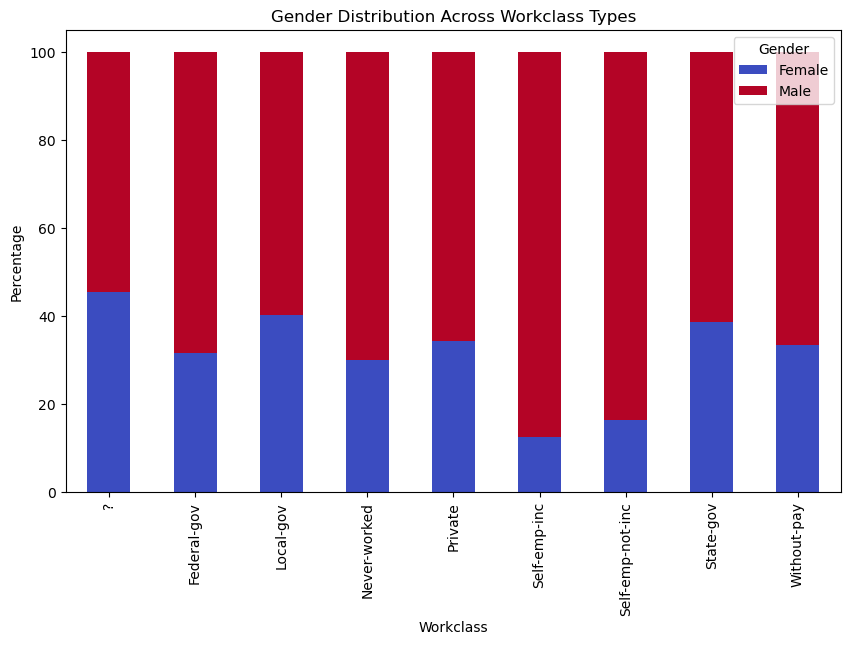

In [63]:
#How does the gender distribution vary across different workclass types?
# Crosstab of gender vs workclass
gender_workclass = pd.crosstab(df['workclass'], df['gender'], normalize='index') * 100
print(gender_workclass)

# Plot
gender_workclass.plot(kind='bar', figsize=(10,6), stacked=True, colormap="coolwarm")
plt.title("Gender Distribution Across Workclass Types")
plt.ylabel("Percentage")
plt.xlabel("Workclass")
plt.legend(title="Gender")
plt.show()


In [64]:
#Which columns contain missing values (represented by '?') and what is the exact count or percentage of missing values in each of those columns (workclass, occupation, native-country)?
# Columns with "?" as missing values
missing_counts = {}
for col in ['workclass', 'occupation', 'native-country']:
    count_missing = (df[col] == '?').sum()
    perc_missing = 100 * count_missing / len(df)
    missing_counts[col] = {"count": count_missing, "percent": perc_missing}

import pandas as pd
pd.DataFrame(missing_counts).T


,count,percent
workclass,2799.0,5.730724
occupation,2809.0,5.751198
native-country,857.0,1.754637


In [65]:
#Should the missing values in categorical columns like workclass and occupation be imputed with the mode, a generic category ('Unknown'), or dropped, and what justification supports that choice?
# Replace "?" with "Unknown"
df[['workclass','occupation','native-country']] = df[['workclass','occupation','native-country']].replace('?', 'Unknown')

# Check result
for col in ['workclass','occupation','native-country']:
    print(df[col].value_counts().head())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Name: count, dtype: int64
occupation
Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: count, dtype: int64
native-country
United-States    43832
Mexico             951
Unknown            857
Philippines        295
Germany            206
Name: count, dtype: int64


In [66]:
#Are there any inconsistencies in the naming or formatting of categories (e.g., are 'United-States' and 'United States' considered the same in the full dataset for native-country)?
# Unique categories for native-country
print(df['native-country'].unique())

# Check for leading/trailing spaces in all categorical columns
cat_cols = ['workclass','education','marital-status',
            'occupation','relationship','race',
            'gender','native-country']

for col in cat_cols:
    bad_vals = df[col][df[col].str.contains(" ")] if df[col].dtype == "object" else None
    print(f"{col} → unique: {df[col].nunique()}")


['United-States' 'Unknown' 'Peru' 'Guatemala' 'Mexico'
 'Dominican-Republic' 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti'
 'El-Salvador' 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India'
 'Cambodia' 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada'
 'Portugal' 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica'
 'Ecuador' 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']
workclass → unique: 9
education → unique: 16
marital-status → unique: 7
occupation → unique: 15
relationship → unique: 6
race → unique: 5
gender → unique: 2
native-country → unique: 42


In [67]:
df['native-country'].value_counts().sort_index()


native-country
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
Nicaragua                        49
Outlying-US(G

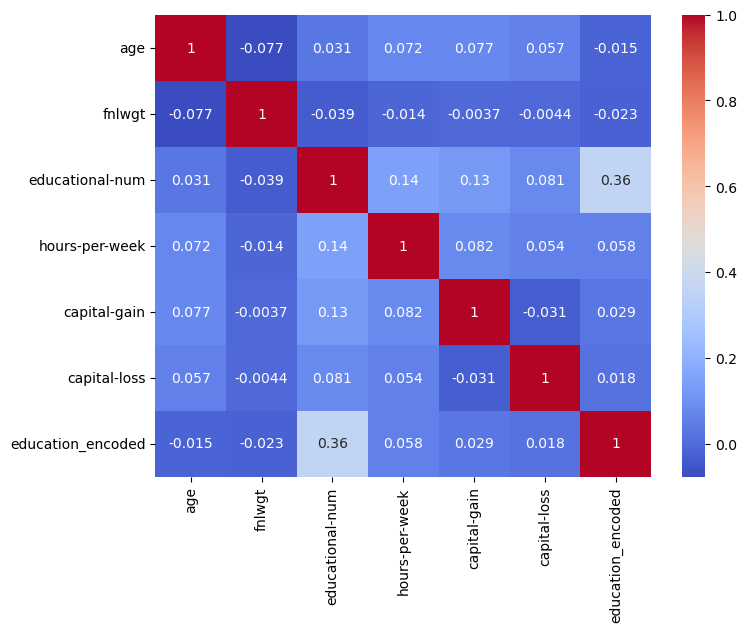

In [75]:
#Are there any redundant or highly correlated features that should be considered for removal (e.g., do education and education-num essentially represent the same information)?
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical 'education' to numeric for comparison
df['education_encoded'] = df['education'].astype('category').cat.codes

# Correlation matrix
corr = df[['age','fnlwgt','educational-num','hours-per-week','capital-gain','capital-loss','education_encoded']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [76]:
#Do the numerical columns contain any infeasible zero values (e.g., a person with age 0) or values that are clearly used as placeholders for missing data (e.g., capital-gain=99999)?
# Check ranges of numerical columns
print("Age range:", df['age'].min(), "to", df['age'].max())
print("fnlwgt range:", df['fnlwgt'].min(), "to", df['fnlwgt'].max())
print("educational-num range:", df['educational-num'].min(), "to", df['educational-num'].max())
print("hours-per-week range:", df['hours-per-week'].min(), "to", df['hours-per-week'].max())
print("capital-gain range:", df['capital-gain'].min(), "to", df['capital-gain'].max())
print("capital-loss range:", df['capital-loss'].min(), "to", df['capital-loss'].max())

# Check for infeasible zero values or placeholder codes
print("\nCount of age == 0:", (df['age'] == 0).sum())
print("Count of hours-per-week == 0:", (df['hours-per-week'] == 0).sum())
print("Count of capital-gain == 99999:", (df['capital-gain'] == 99999).sum())


Age range: 17 to 90
fnlwgt range: 12285 to 1490400
educational-num range: 1 to 16
hours-per-week range: 1 to 99
capital-gain range: 0 to 99999
capital-loss range: 0 to 4356

Count of age == 0: 0
Count of hours-per-week == 0: 0
Count of capital-gain == 99999: 244


In [77]:
#Are there missing values in the dataset?
# Check for actual NaN values
print("NaN values per column:")
print(df.isnull().sum())

# Check for '?' placeholders (used as missing values in this dataset)
print("\n'?' placeholders per column:")
for col in df.columns:
    missing_count = (df[col] == ' ?').sum()
    if missing_count > 0:
        print(f"{col}: {missing_count}")


NaN values per column:
age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
education_encoded    0
dtype: int64

'?' placeholders per column:


In [78]:
#How are missing values represented (e.g., "?", "NaN", blanks)?
# Check unique entries in columns known to have missing values
for col in ["workclass", "occupation", "native-country"]:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())



Unique values in workclass:
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in occupation:
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']

Unique values in native-country:
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


In [79]:
#How many rows have missing values in workclass and occupation?
# Count rows with missing values in workclass and occupation
missing_workclass = df[df["workclass"] == " ?"].shape[0]
missing_occupation = df[df["occupation"] == " ?"].shape[0]

print("Rows with missing workclass:", missing_workclass)
print("Rows with missing occupation:", missing_occupation)


Rows with missing workclass: 0
Rows with missing occupation: 0


In [80]:
# Rows where either workclass or occupation has missing value
missing_rows = df[(df["workclass"] == " ?") | (df["occupation"] == " ?")].shape[0]
print("Rows with missing workclass or occupation:", missing_rows)


Rows with missing workclass or occupation: 0


In [82]:
#Should we drop rows with "?" values, or replace them with "Unknown"?
df["workclass"] = df["workclass"].replace(" ?", "Unknown")
df["occupation"] = df["occupation"].replace(" ?", "Unknown")
df["native-country"] = df["native-country"].replace(" ?", "Unknown")


In [6]:
#Are there duplicate rows? If so, how many, and should we drop them?
import pandas as pd

# Assuming your dataset is already loaded into df
# df = pd.read_csv("your_dataset.csv")

# 1️⃣ Replace missing values represented by "?" with "Unknown" in categorical columns
categorical_cols = ['workclass', 'occupation', 'native-country']
for col in categorical_cols:
    df[col] = df[col].replace('?', 'Unknown')

# 2️⃣ Standardize country names: replace dash '-' with space
df['native-country'] = df['native-country'].str.replace('-', ' ', regex=False)

# 3️⃣ Optional: check unique values after cleaning
for col in categorical_cols + ['marital-status', 'relationship', 'race', 'gender', 'education', 'income']:
    print(f"Unique values in {col}: {df[col].unique()}")

# 4️⃣ Optional: Save cleaned dataset
# df.to_csv("cleaned_dataset.csv", index=False)


Unique values in workclass: ['Private' 'Local-gov' 'Unknown' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Unknown'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Unique values in native-country: ['United States' 'Unknown' 'Peru' 'Guatemala' 'Mexico'
 'Dominican Republic' 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti'
 'El Salvador' 'Puerto Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India'
 'Cambodia' 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada'
 'Portugal' 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica'
 'Ecuador' 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying US(Guam USVI etc)' 'France' 'Holand Netherlands']
Unique values in marital-status: ['Never-married' 'Married-civ-s

                age  hours-per-week  capital-gain  capital-loss
count  48842.000000    48842.000000  48842.000000  48842.000000
mean      38.643585       40.422382   1079.067626     87.502314
std       13.710510       12.391444   7452.019058    403.004552
min       17.000000        1.000000      0.000000      0.000000
25%       28.000000       40.000000      0.000000      0.000000
50%       37.000000       40.000000      0.000000      0.000000
75%       48.000000       45.000000      0.000000      0.000000
max       90.000000       99.000000  99999.000000   4356.000000


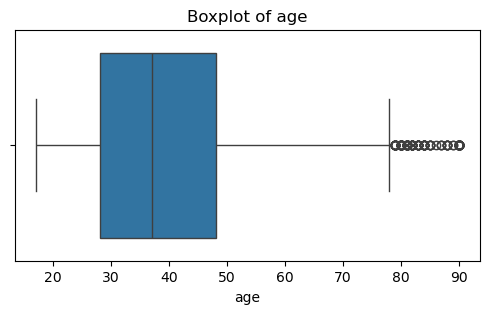

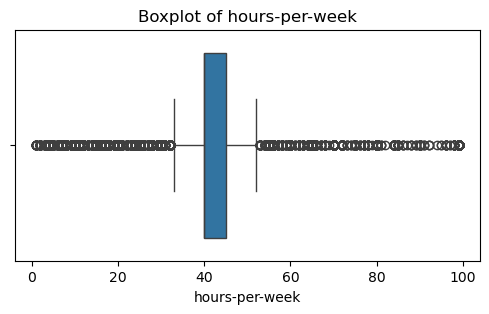

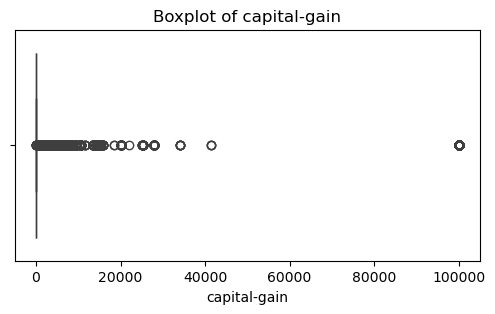

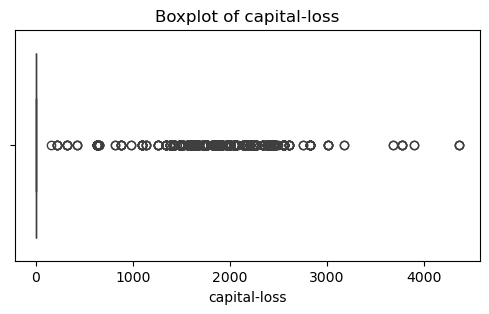

age outliers:
        age
193     79
234     80
899     90
926     79
951     80
...    ...
48558   90
48648   90
48740   85
48775   82
48806   81

[216 rows x 1 columns]
hours-per-week outliers:
        hours-per-week
4                  30
5                  30
7                  32
9                  10
16                 25
...               ...
48825              30
48826              20
48829              60
48834              11
48840              20

[13496 rows x 1 columns]
capital-gain outliers:
        capital-gain
3              7688
7              3103
10             6418
14             3103
25             7298
...             ...
48796          3471
48799         99999
48819         15020
48829          1086
48841         15024

[4035 rows x 1 columns]
capital-loss outliers:
        capital-loss
52             1721
82             1876
129            2415
143            1887
154            1887
...             ...
48722          1887
48724          1602
48726          1669


In [7]:
#Are there any outliers in numerical columns (age, hours-per-week, capital-gain, capital-loss)?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns
num_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

# 1️⃣ Summary statistics
print(df[num_cols].describe())

# 2️⃣ Boxplots to visualize outliers
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 3️⃣ Optional: detect outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} outliers:\n", outliers[[col]])


In [8]:
#Are all ages realistic (e.g., >0, <100)?
import pandas as pd

# 1️⃣ Check for unrealistic ages
unrealistic_ages = df[(df['age'] <= 0) | (df['age'] >= 100)]

if unrealistic_ages.empty:
    print("All ages are realistic (>0 and <100). ✅")
else:
    print("Unrealistic ages found:")
    print(unrealistic_ages[['age']])


All ages are realistic (>0 and <100). ✅


In [ ]:
#Should we treat fnlwgt column as relevant, or remove it since it may not help modeling?


In [9]:
#Are there spelling inconsistencies in categorical data (e.g., Self-emp-not-inc vs Self-emp-inc)?
import pandas as

# 1️⃣ Replace missing values represented by "?" with "Unknown"
categorical_cols = ['workclass', 'occupation', 'native-country']
for col in categorical_cols:
    df[col] = df[col].replace('?', 'Unknown')

# 2️⃣ Standardize country names: replace dash '-' with space
df['native-country'] = df['native-country'].str.replace('-', ' ', regex=False)

# 3️⃣ Optional: Strip extra spaces from all categorical columns
all_cat_cols = ['workclass', 'occupation', 'native-country', 'marital-status', 
                'relationship', 'race', 'gender', 'education', 'income']
for col in all_cat_cols:
    df[col] = df[col].str.strip()

# 4️⃣ Check unique values to verify consistency
for col in all_cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")


SyntaxError: invalid syntax (4011160633.py, line 2)